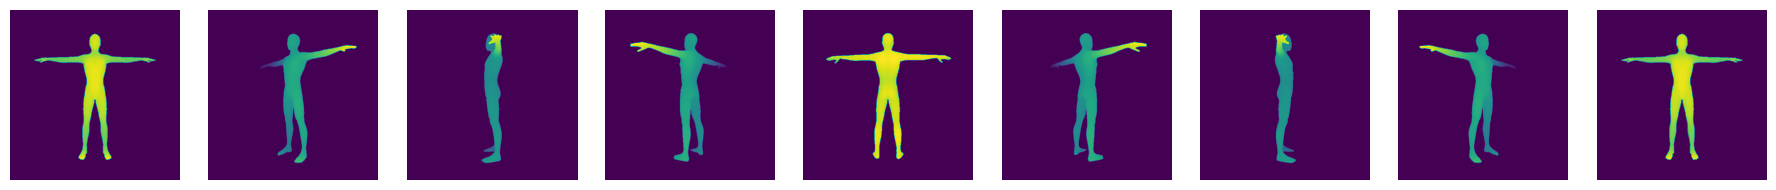

In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/home/jorge/thesis')

from text3d2video.utilities.ipython_utils import display_ims
from text3d2video.artifacts.anim_artifact import AnimationArtifact
from text3d2video.rendering import render_depth_map
import torch

torch.set_grad_enabled(False)

animation_tag = 'mixamo-human_rotation:latest'
animation = AnimationArtifact.from_wandb_artifact_tag(animation_tag)

n_frames = 9
frame_indices = animation.frame_indices(9)
cameras, meshes = animation.load_frames(frame_indices)

depths = render_depth_map(meshes, cameras)
display_ims(depths)

In [14]:
from text3d2video.backprojection import (
    project_visible_verts_to_camera,
)

texture_res = 64

frame_vert_xys = []
frame_vert_uvs = []
for render_cams, render_meshes in zip(cameras, meshes):
    xys, uvs = project_visible_verts_to_camera(
        render_meshes,
        render_cams,
    )
    frame_vert_xys.append(xys.cpu())
    frame_vert_uvs.append(uvs.cpu())

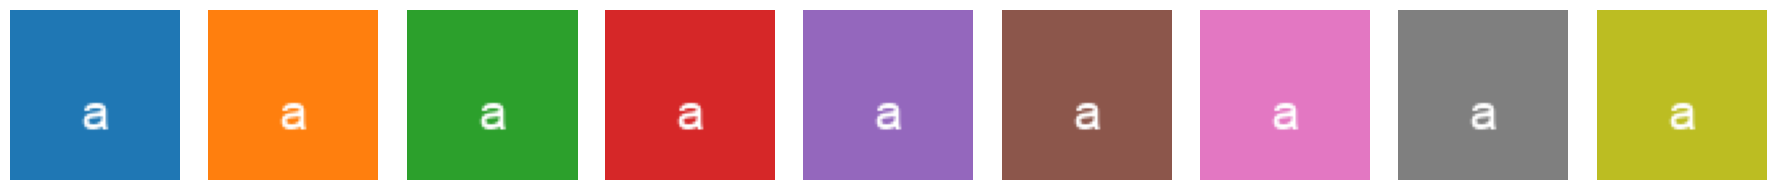

In [15]:
from matplotlib.cm import get_cmap
from text3d2video.utilities.testing_utils import test_img
import torchvision.transforms.functional as TF

CAMERA_RES = 64
cmap = get_cmap("tab10")

indices = torch.arange(n_frames)
colors = cmap(indices)

feature_ims = [
    test_img(resolution=CAMERA_RES, color=colors[i][0:3], txt="a")
    for i in range(n_frames)
]
feature_maps = torch.stack([TF.to_tensor(img) for img in feature_ims])

display_ims(feature_ims)

In [16]:
# frame_xy_coords
# frame_uv_coords

from text3d2video.backprojection import aggregate_views_vert_texture

vert_ft = aggregate_views_vert_texture(
    feature_maps,
    meshes.num_verts_per_mesh()[0],
    frame_vert_xys,
    frame_vert_uvs,
)

vert_ft.shape

torch.Size([14442, 3])